#In this Notebook, I build predictive algorithm using decision tree to predict the suitable crop to grow in a particular farm based on various factors/features (like ph of the soil and rainfull, etc).

#Features:

    N - ratio of Nitrogen content in soil
    P - ratio of Phosphorous content in soil
    K - ratio of Potassium content in soil
    temperature - temperature in degree Celsius
    humidity - relative humidity in %
    ph - ph value of the soil
    rainfall - rainfall in mm


#Target:
    label - Crop type


#Start Implementation:

#Import Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns

#Read Data:

In [ ]:
df=pd.read_csv("/content/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [ ]:
metadata=df.describe()
metadata

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.shape

(2200, 8)

In [ ]:
df.isna().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


#Data visualization

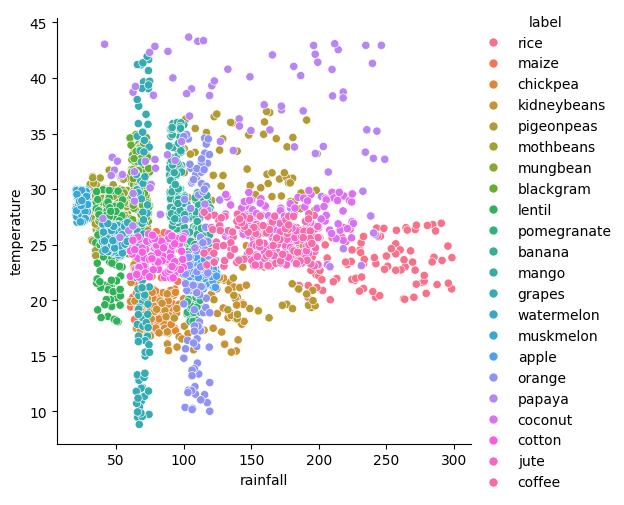

In [ ]:
sns.relplot(x='rainfall',y='temperature',data=df,kind='scatter',hue='label')
plt.show()

#Determine inputs/features (X) and target (y)

In [ ]:
X=df.drop(['label'],axis=1)
Y=df['label']

In [ ]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


#Make Label Encoding

In [ ]:
from sklearn import preprocessing
encode=preprocessing.LabelEncoder()
y=encode.fit_transform(Y)

In [ ]:
y

array([20, 20, 20, ...,  5,  5,  5])

#Splitting data into training and testing data:

In [ ]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=.2)
print(len(X_train),len(y_train),len(X_test),len(y_test))

1760 1760 440 440


#Train decision Tree algorithm:

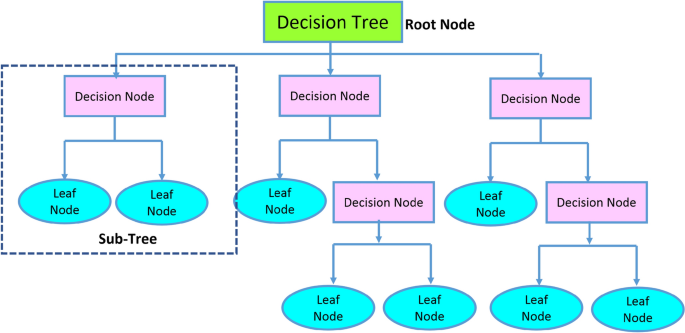

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier()
Classifier.fit(X_train,y_train)

DecisionTreeClassifier()

#Get the predicted/estimated outcome (predicted y)

In [ ]:
y_pred=Classifier.predict(X_test)

#Find accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9818181818181818